In [1]:
%pylab inline
from Bio import Phylo
from io import StringIO
import ete3
from importlib import reload
from scipy.optimize import curve_fit

sys.path.append('./methods/')
import tree_methods
import sum_exp_methods as em

Populating the interactive namespace from numpy and matplotlib


In [103]:
def sum_exp(x,*params):
    L = len(params)
    assert L%2==0
    coeffs = params[:L//2]
    lens = params[L//2:]
    return sum([coeffs[i]*(1-exp(-x/l)) for i,l in enumerate(lens)],axis=0)

In [157]:
xfit = linspace(0,1000,1000)
alpha = .5
y = xfit**alpha
k = 3 # number of exponentials
popt,_ = curve_fit(sum_exp,xfit,y,p0=ones(2*k))

L = len(popt)
coeff_list = popt[:L//2]
corr_len_list = popt[L//2:]

In [162]:
reload(em)
RE = em.RandomEvo_Exp(coeff_list,corr_len_list,seed=10)
# RE = em.RandomEvo_Exp(array([0.001]),array([1]),seed=10)
RE.run_evo(1000)

In [164]:
tree_string = RE.get_full_newick(mutations=False)
T = ete3.Tree(tree_string,format=1)

TS = ete3.TreeStyle()
TS.scale=4
TS.branch_vertical_margin=4
TS.show_leaf_name=False

for n in T.traverse():
    nstyle=ete3.NodeStyle()
    nstyle["size"]=0
    n.set_style(nstyle)


T.ladderize()
T.render('epistasis.pdf',tree_style=TS);

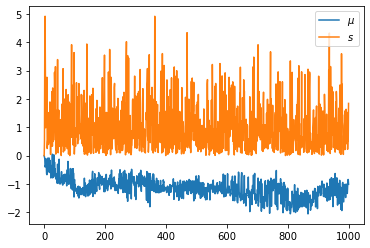

In [165]:
plot(RE.mu_traj,label='$\\mu$')
plot(RE.ds_traj,label='$s$')
legend()

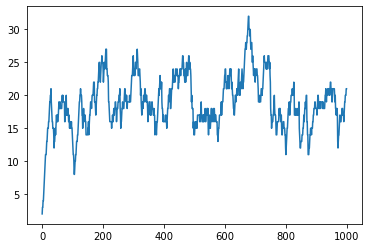

In [163]:
plot(RE.num_active_traj,label='$\\mu$')